In [31]:
import pandas as pd

In [32]:
train = pd.read_csv("/content/drive/MyDrive/code/assets/Automobile.csv")
train.head(1)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression


# Set Matplotlib defaults
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


In [34]:
X = train.drop(columns=["price"])
y = train["price"]

In [40]:
print(f"size: {X.shape}\n\n\n columns: {X.columns}")

size: (201, 25)


 columns: Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')


In [43]:
numeric = X.select_dtypes(include=["int", "float"])
print(f"Numeric Features\n\n\nsize: {numeric.shape}\n\n\n columns: {numeric.columns}")

Numeric Features


size: (201, 15)


 columns: Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')


In [46]:
numeric.head(1)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27


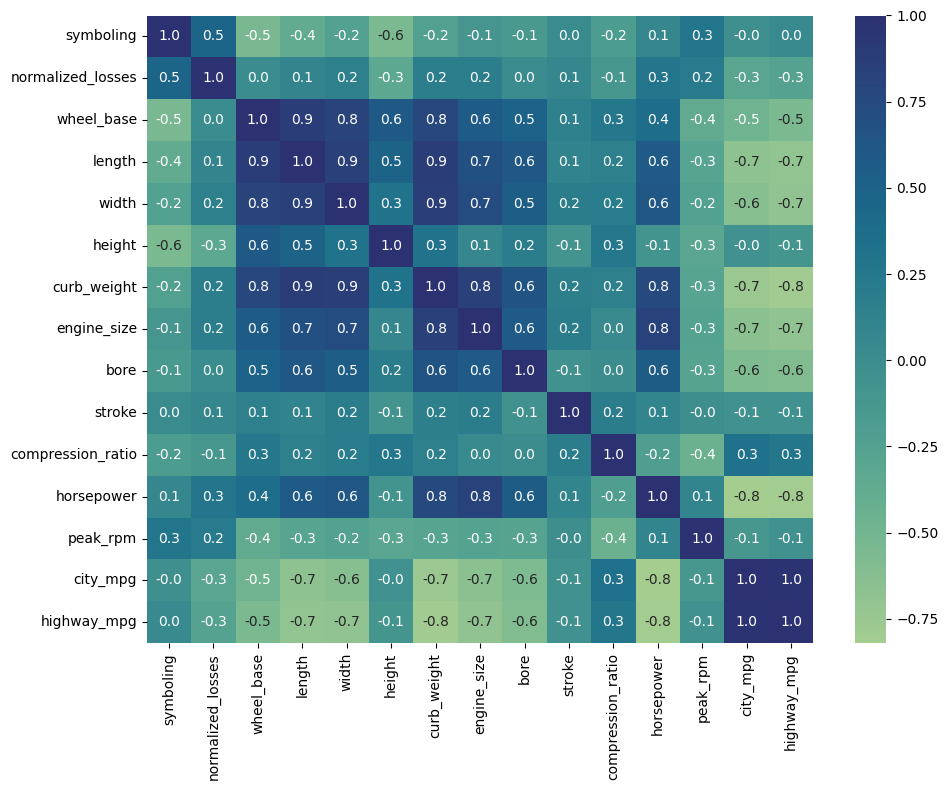

In [53]:
num_corr = numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(num_corr, annot=True, fmt=".1f", cmap="crest")
plt.show()

In [44]:
categoric = X.select_dtypes(exclude=["int", "float"])
print(f"Categorical Features\n\n\nsize: {categoric.shape}\n\n\n columns: {categoric.columns}")

Categorical Features


size: (201, 10)


 columns: Index(['make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'number_of_cylinders',
       'fuel_system'],
      dtype='object')


In [45]:
categoric.head(1)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,engine_type,number_of_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [80]:
for col in X.select_dtypes("object"):
    X[col], _ = X[col].factorize()

X.head(1)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,168,0,0,0,0,0,0,0,88.6,...,0,130,0,3.47,2.68,9.0,111,5000,21,27


In [87]:
desc = X.dtypes.apply(lambda x: np.issubdtype(x, np.integer))

In [90]:
discrete_valueus = X.select_dtypes("int")
discrete_valueus.head(1)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,168,0,0,0,0,0,0,0,2548,0,0,130,0,111,5000,21,27


In [92]:
non_discrete =  X.select_dtypes("float")
non_discrete.head(1)

,wheel_base,length,width,height,bore,stroke,compression_ratio
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0


In [106]:
def compute_mi(X, y, discrete):
    # mi
    mi_score = mutual_info_regression(X, y, discrete_features=discrete, random_state=42)

    # df
    mi_score = pd.Series(mi_score, name="MI", index=X.columns)

    # sort
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [108]:
score = compute_mi(X, y, desc)
score.head(5)

,MI
curb_weight,1.489194
horsepower,1.251062
engine_size,1.009648
highway_mpg,0.946426
city_mpg,0.834179


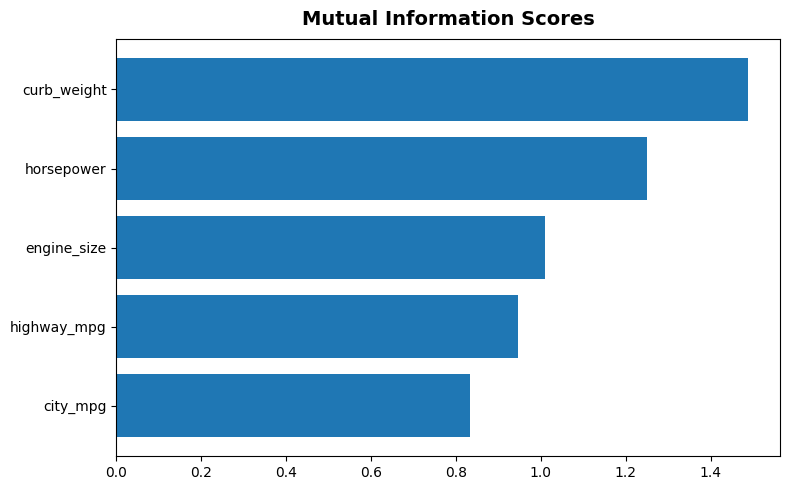

In [114]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(score.head(5))